# Rosenbrock Function

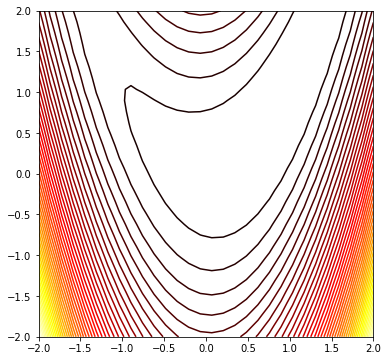

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x1 = np.linspace(-2,2,30)
x2 = np.linspace(-2,2,30)

# Creating 2-D grid of features
[X, Y] = np.meshgrid(x1,x2)
Z = (1 - X)**2 + 5*(Y - X**2)**2
plt.figure(figsize=(6,6))
plt.contour(X,Y,Z,55,cmap='hot')
plt.show()

# Exact Line Search 

In [20]:
# function to find the initial bracket of the objective function 
# Have directly specified the simplified version of the function
def f(alpha,x,d):
  
  return (1-(x[0]-alpha*d[0]))**2 + 100*((x[1]-alpha*d[1])-(x[0]-alpha*d[0])**2)**2
 
# derivative of the objective function 

def grad_alpha(f,alpha,x,d):
  h = 0.00001
  return (f(alpha+h,x,d)-f(alpha,x,d))/h

In [2]:
def bracket_minimum(alpha,x,d,s,k):

  a, fa = alpha,  f(alpha,x,d)
  b, fb = a+s , f(a+s,x,d)

  if fb > fa:
    a,b = b,a 
    fa, fb = fb,fb
    s = -s

  while True:
    c, fc = b+s, f(b+s,x,d)
    if fc > fb:
      if a < c:
        return [a,c]
      else:
        return [c,a]
    a,fa,b,fb = b,fb,c,fc
    s*=k

In [3]:
def bisection_root_finding(a,b,x,d,eps):

  if a > b : 
    a,b = b,a 
  fa, fb = grad_alpha(f,a,x,d), grad_alpha(f,b,x,d)
  if fa == 0:
    b = a
    return (a)

  if fb == 0:
    a = b
    return (b)
  iter = 0
 
  while abs(b - a) > eps:
    iter +=1
    c = (a+b)/2
    y = grad_alpha(f,c,x,d)

    if y == 0:
      a,b = c, c
      break

    if np.sign(y)  < 0  :
      a = c
    else:
      b = c

  return (a+b)/2

In [4]:
def line_search(alpha,x,d):
  
  a,b = bracket_minimum(alpha,x,d,s=0.01,k=2.0)
  alpha = bisection_root_finding(a,b,x,d,eps=1e-5)
  return alpha

In [7]:
alpha  = 5
x = np.array([1,2])
d = np.array([0.89,-0.447])
line_search(alpha,x,d)

-0.3862854003906251

# Gradient Descent 
Implementing gradient descent algorithm to get the minima of the Rosenbrock function, and also using exact line search algorithm for optimum step length in every iteration.

In [14]:
# Rosenbrock's Banana Function
def fun(x,a):
  pow = a
  if pow == 0:
    return (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2
   
  else:
    h = 0.00001
    x1 = np.array([x[0]+h,x[1]])
    x2 = np.array([x[0],x[1]+h])
    # The gradient Vector
    g = np.array([(fun(x1,0)-fun(x,0))/h,(fun(x2,0)-fun(x,0))/h])
    return g

In [18]:
def gradient_descent(x_init,alpha,eps):
  
  iter = 0
  arr = []
  x, f ,g = x_init,fun(x_init,0),fun(x_init,1)
  arr.append(x) 
  d = np.array(g/np.linalg.norm(g))
  if (np.linalg.norm(g)==0):
    print(" The min value of the function is:",f, "for value  of x:",x)
    return x
  else:
    while abs(f) > eps:

      iter+=1
      alpha = line_search(alpha,x,d)
      x = x - alpha*d
      arr.append(x) 
      f, g = fun(x,0) , fun(x,1)
      d = np.array(g/np.linalg.norm(g))
      print(iter,":","f:",f )
    
    return (x,arr)

In [21]:
x = np.array([1,2])
alpha = 4
p = 0.1
beta = 1e-4
eps = 1e-5
x,arr = gradient_descent(x,alpha,eps)
print("The minimum point of the Rosenbrock function:",x)

1 : f: 8.119043304158598
2 : f: 8.11753265521711
3 : f: 8.115998058843157
4 : f: 8.114488565526697
5 : f: 8.112956450012003
6 : f: 8.11145101889225
7 : f: 8.109922458443107
8 : f: 8.108420009567265
9 : f: 8.106892066910072
10 : f: 8.105390172168134
11 : f: 8.10386349136107
12 : f: 8.102363449800364
13 : f: 8.100837114216839
14 : f: 8.099336933077186
15 : f: 8.09781000225749
16 : f: 8.096309107187386
17 : f: 8.09478100321202
18 : f: 8.093278871825271
19 : f: 8.09174876762115
20 : f: 8.090244046997139
21 : f: 8.088709233384591
22 : f: 8.087200157900714
23 : f: 8.08566097489898
24 : f: 8.084146096982915
25 : f: 8.082597885624448
26 : f: 8.08107574665936
27 : f: 8.07952099223351
28 : f: 8.077989888272512
29 : f: 8.076421734865889
30 : f: 8.07488086378528
31 : f: 8.07330449247498
32 : f: 8.071751440150742
33 : f: 8.07015733361603
34 : f: 8.068586331591627
35 : f: 8.066973870375946
36 : f: 8.065386657232164
37 : f: 8.063757641733494
38 : f: 8.062150706903465
39 : f: 8.060492195412474
40 : f:

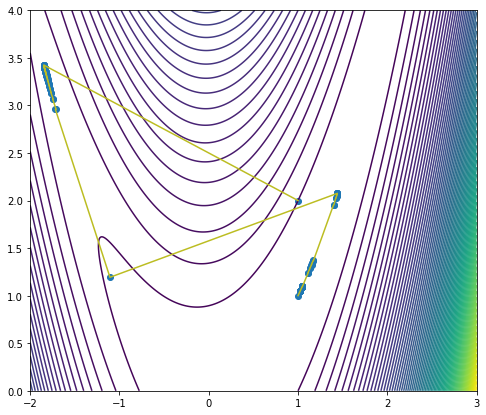

In [22]:
# Plot of the successive points of 'x' as we progress in the direction of the steepest descent.

x1 = np.linspace(-2,3,500)
x2 = np.linspace(0,4,500)
arr = pd.DataFrame(arr)
# Creating 2-D grid of features
[X, Y] = np.meshgrid(x1,x2)
Z = (1 - X)**2 + 5*(Y - X**2)**2

a,b  = arr[0],arr[1]
plt.figure(figsize=(8,7))
plt.scatter(a,b)
plt.contour(X,Y,Z,90)
plt.plot(a,b,color='#bcbd22')
plt.show()